# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [24]:
# Your code here
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('BostonHousing.csv')

The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [4]:
# Your code here
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Record your observations here 


### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


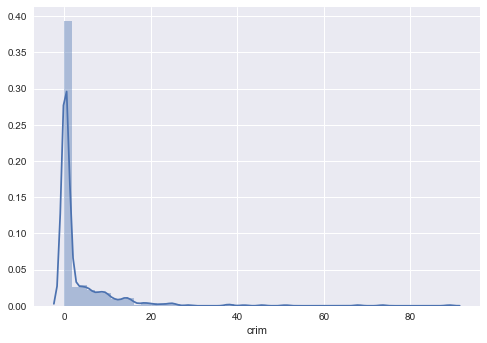

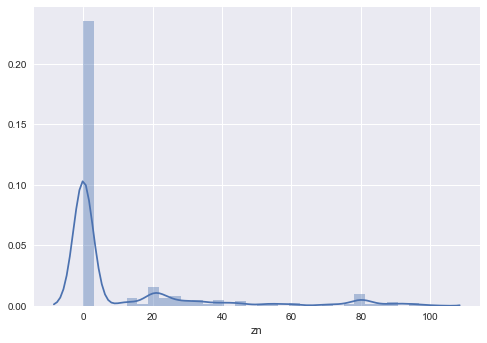

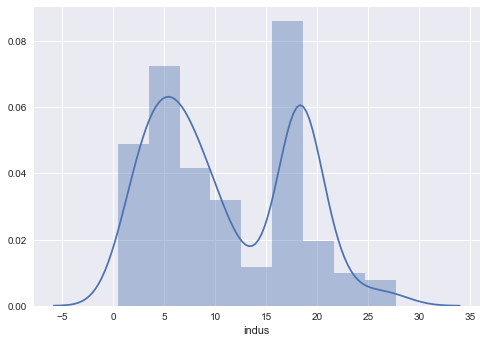

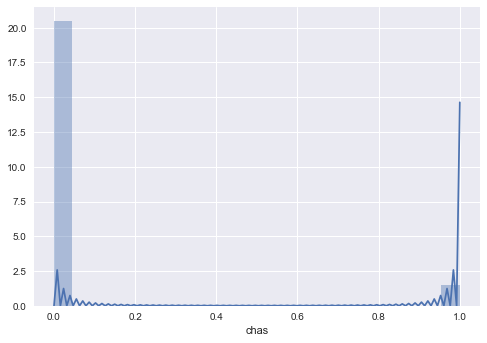

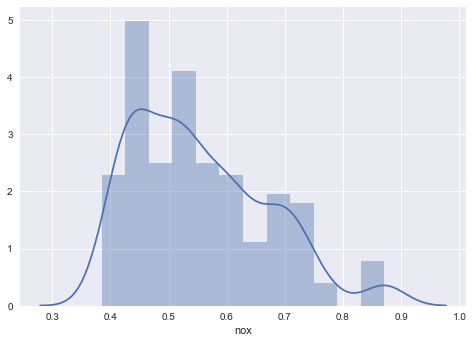

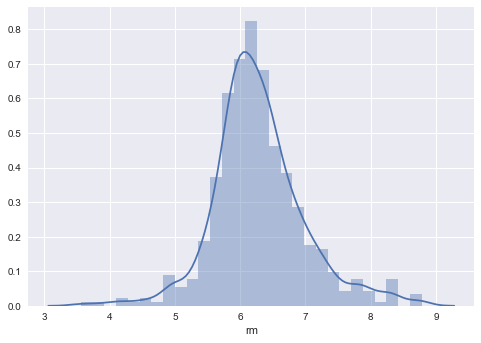

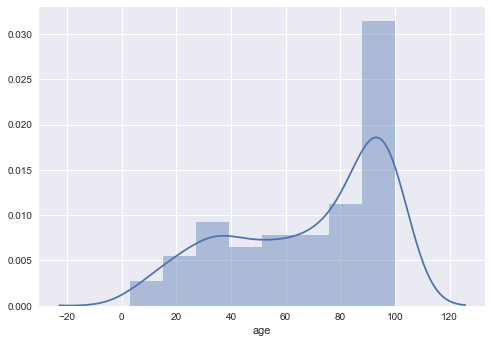

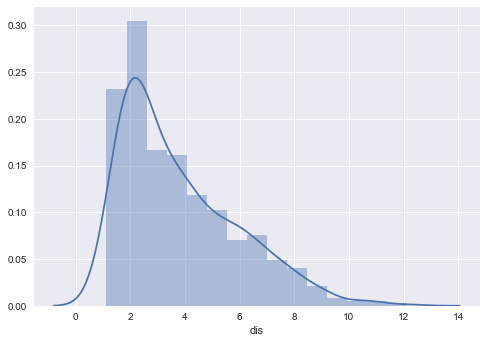

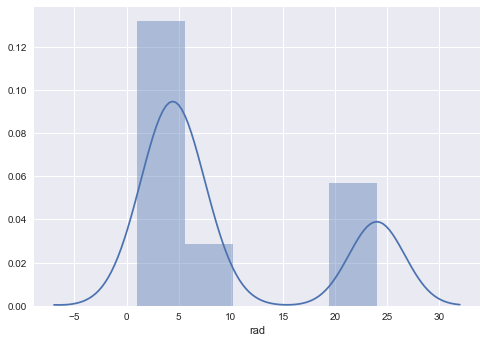

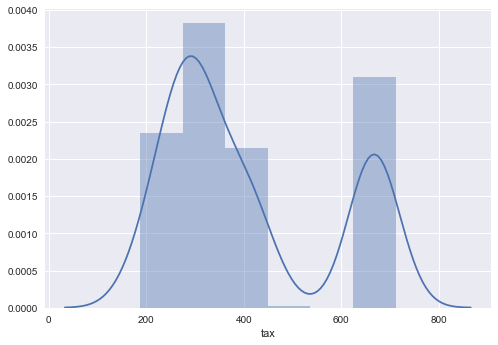

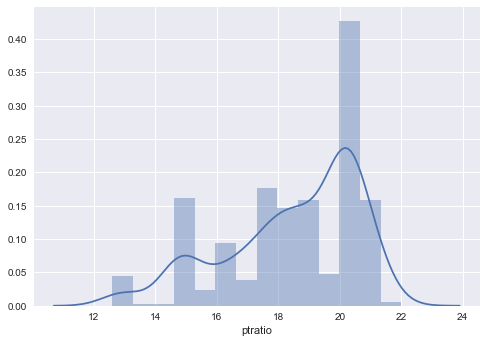

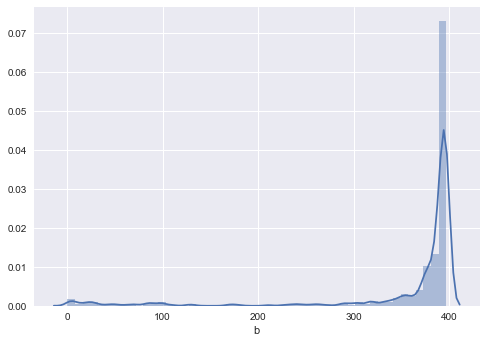

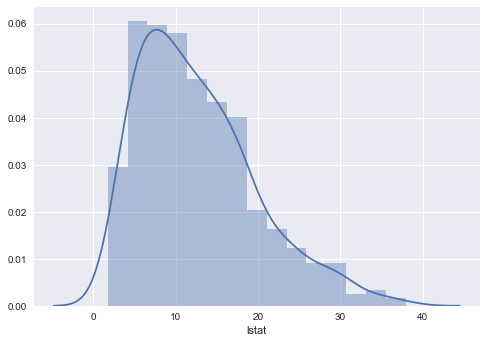

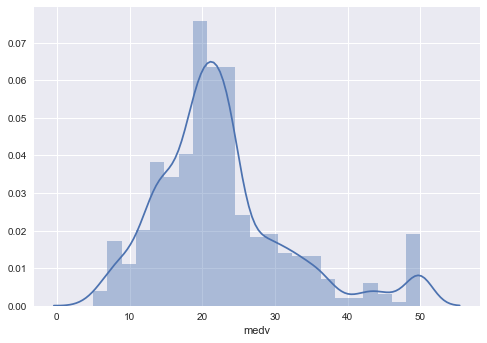

In [6]:
# Your code here 
for var in df.columns:
    sb.distplot(df[var])
    plt.show()

In [116]:
# You observations here 


Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [10]:
# Your code here
df2 = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df2.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

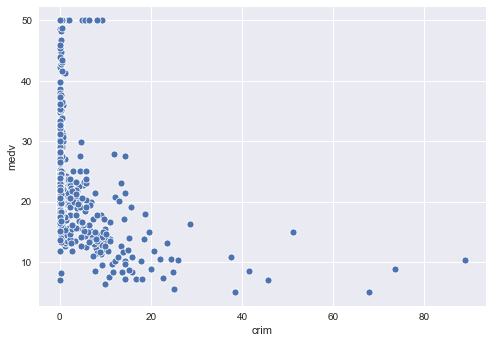

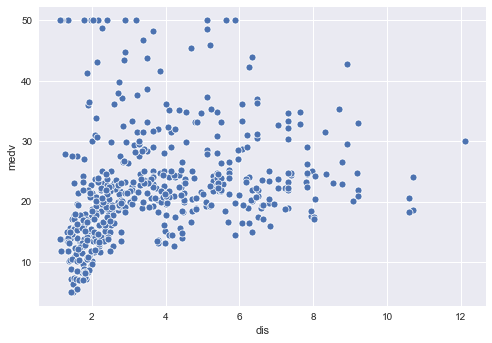

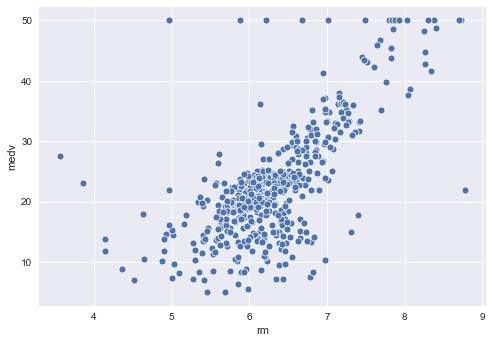

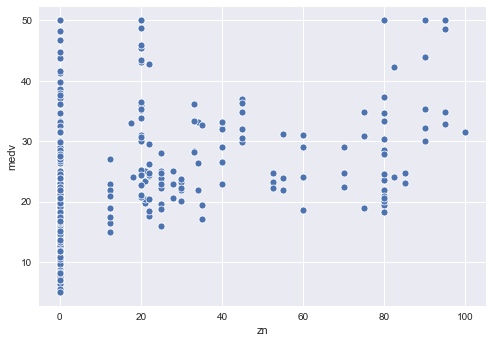

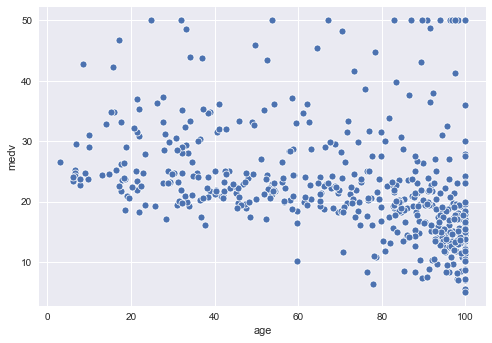

In [13]:
# Your code here
for col in ['crim', 'dis', 'rm', 'zn', 'age']:
    sb.scatterplot(df2[col], df2['medv'])
    plt.show()

In [ ]:
# Your observations here 

Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

crim Regression


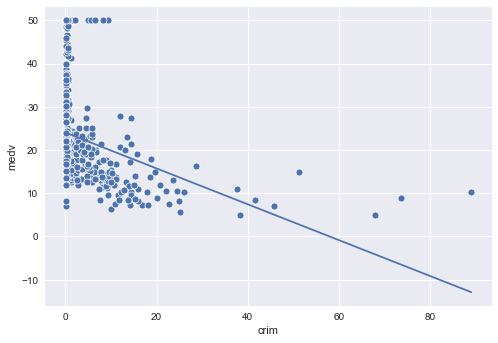

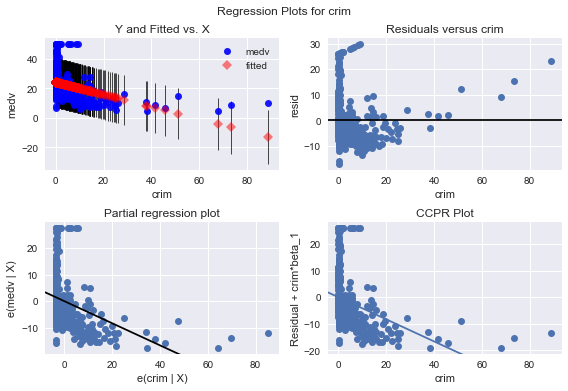

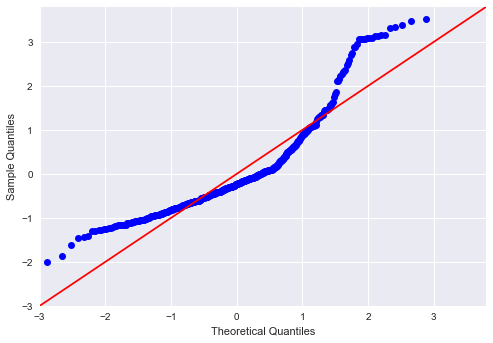

           r2        int    slope         p_val         jb
crim  0.15078  24.033106 -0.41519  1.173987e-19  295.40372
dis Regression


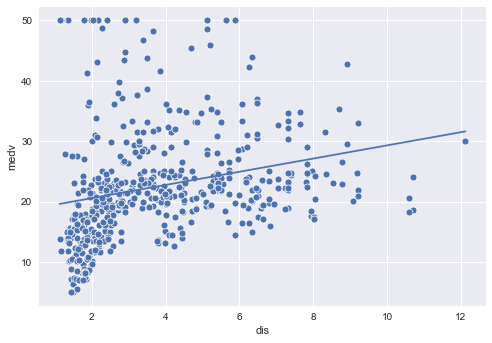

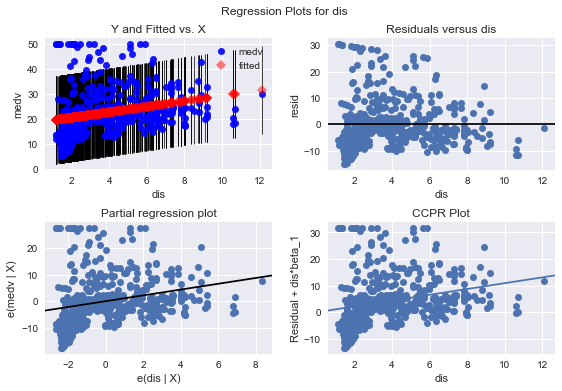

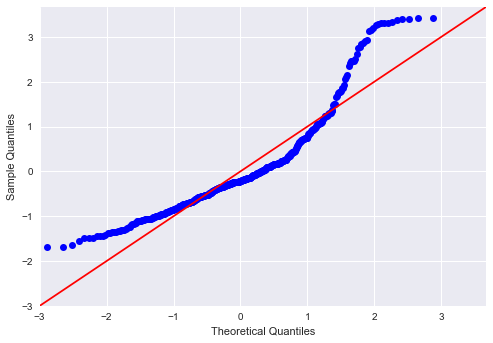

           r2        int     slope         p_val          jb
dis  0.062464  18.390088  1.091613  1.206612e-08  305.104165
rm Regression


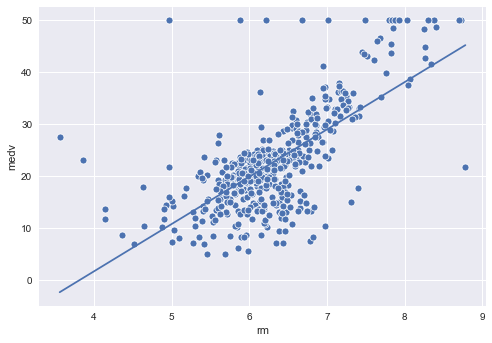

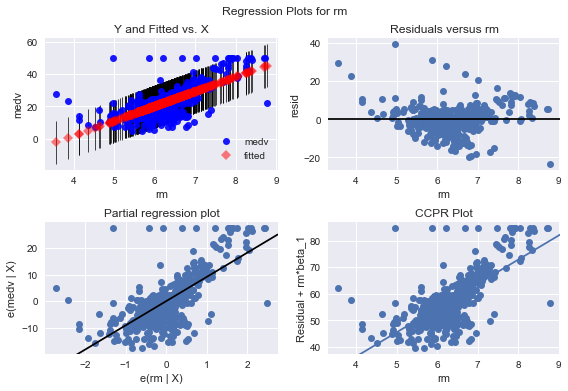

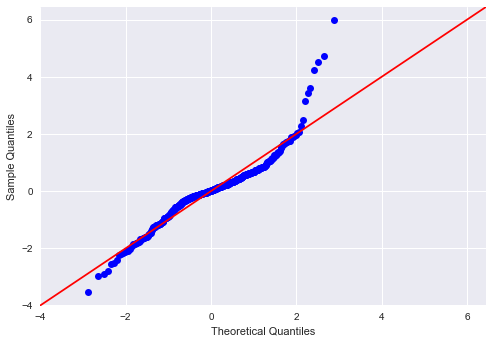

          r2        int     slope         p_val          jb
rm  0.483525 -34.670621  9.102109  2.487229e-74  612.448985
zn Regression


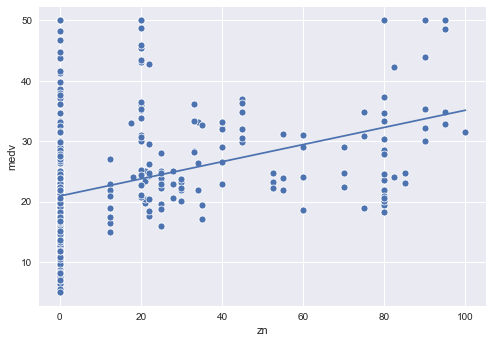

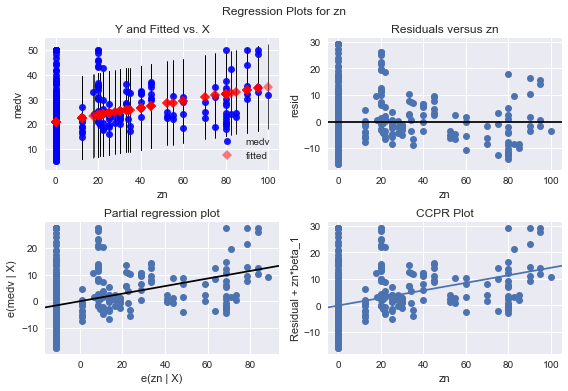

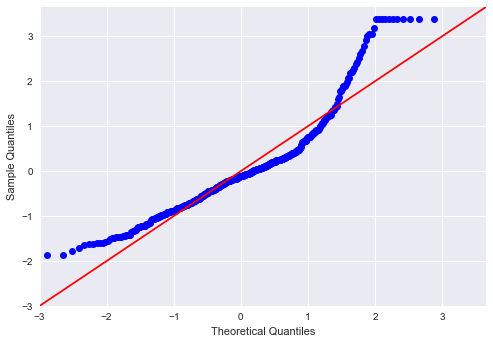

          r2        int    slope         p_val        jb
zn  0.129921  20.917579  0.14214  5.713584e-17  262.3875
age Regression


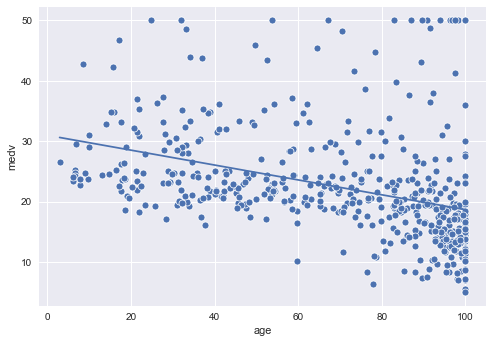

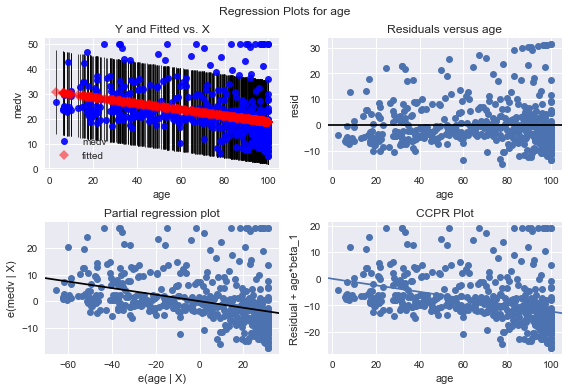

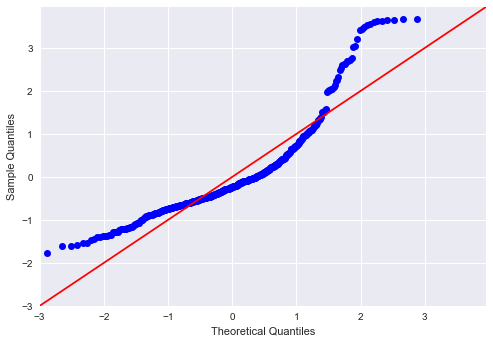

           r2        int     slope         p_val          jb
age  0.142095  30.978678 -0.123163  1.569982e-18  456.983434
            r2        int     slope         p_val          jb
crim  0.150780  24.033106 -0.415190  1.173987e-19  295.403720
dis   0.062464  18.390088  1.091613  1.206612e-08  305.104165
rm    0.483525 -34.670621  9.102109  2.487229e-74  612.448985
zn    0.129921  20.917579  0.142140  5.713584e-17  262.387500
age   0.142095  30.978678 -0.123163  1.569982e-18  456.983434


In [55]:
stat_array = pd.DataFrame( columns = ['r2', 'int', 'slope', 'p_val', 'jb'])
for i, col in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    print(col + ' Regression')
    f = f'medv~{col}'
    ols_df = df[[col, 'medv']]
    model = ols(formula=f, data=ols_df).fit()
    # model.summary()
    
    col_min = df[col].min()
    col_max = df[col].max()
    min_max_df = pd.DataFrame({col: (col_min, col_max)})
    pred_df = model.predict(min_max_df)
    sb.scatterplot(df2[col], df2['medv'])
    sb.lineplot(min_max_df[col], pred_df)
    plt.show()

    sm.graphics.plot_regress_exog(model, col)
    plt.show()
    
    residuals = model.resid
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    stat_array.loc()
    r2 = model.rsquared
    int = model.params[0]
    slope = model.params[1]
    p_val = model.pvalues[1]
    jb = sms.jarque_bera(residuals)[0]
    stat_data = np.array([[r2, int, slope, p_val, jb]])
    stat_frame = pd.DataFrame(data = stat_data, index = [col], columns = ['r2', 'int', 'slope', 'p_val', 'jb'])
    print(stat_frame)
    stat_array = stat_array.append(stat_frame)

print(stat_array)

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~crim
-------------------------------------------------------------------------------------


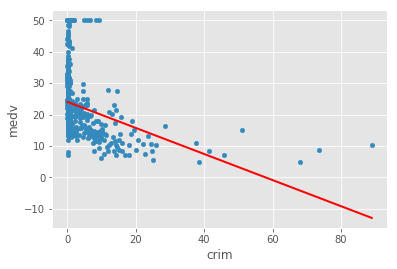

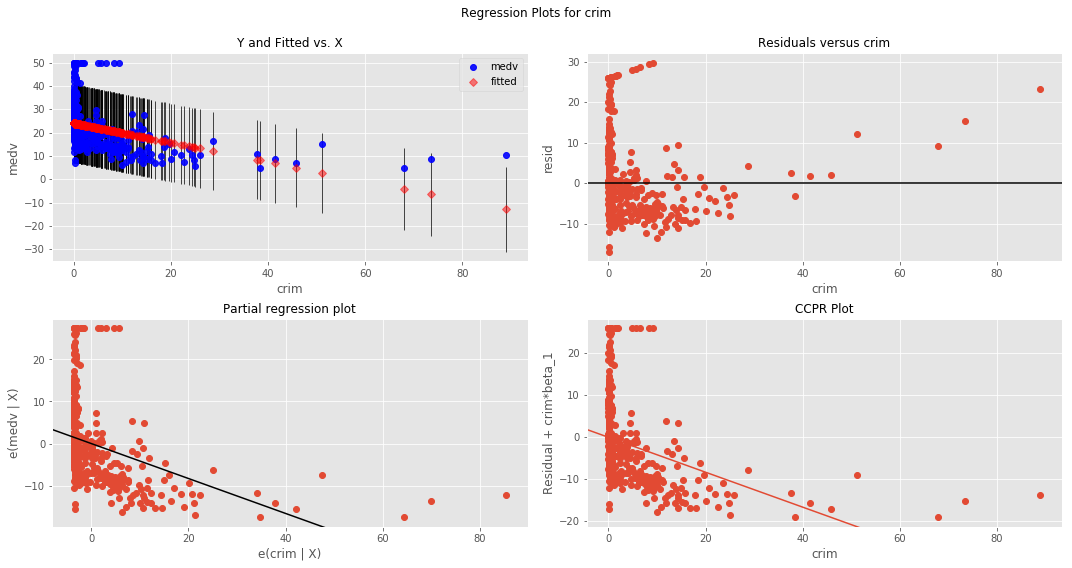

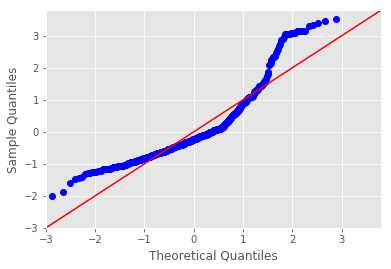

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~dis
-------------------------------------------------------------------------------------


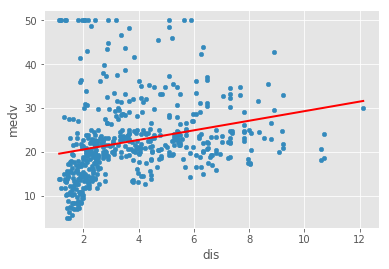

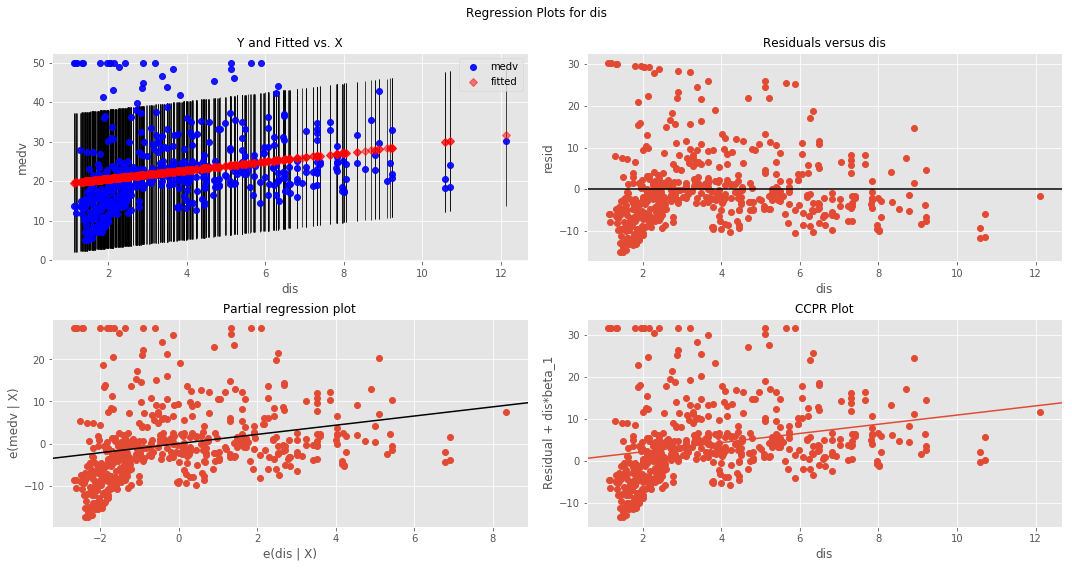

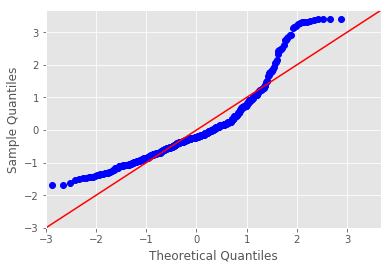

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~rm
-------------------------------------------------------------------------------------


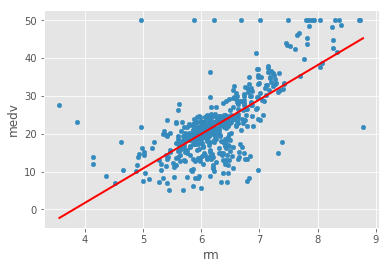

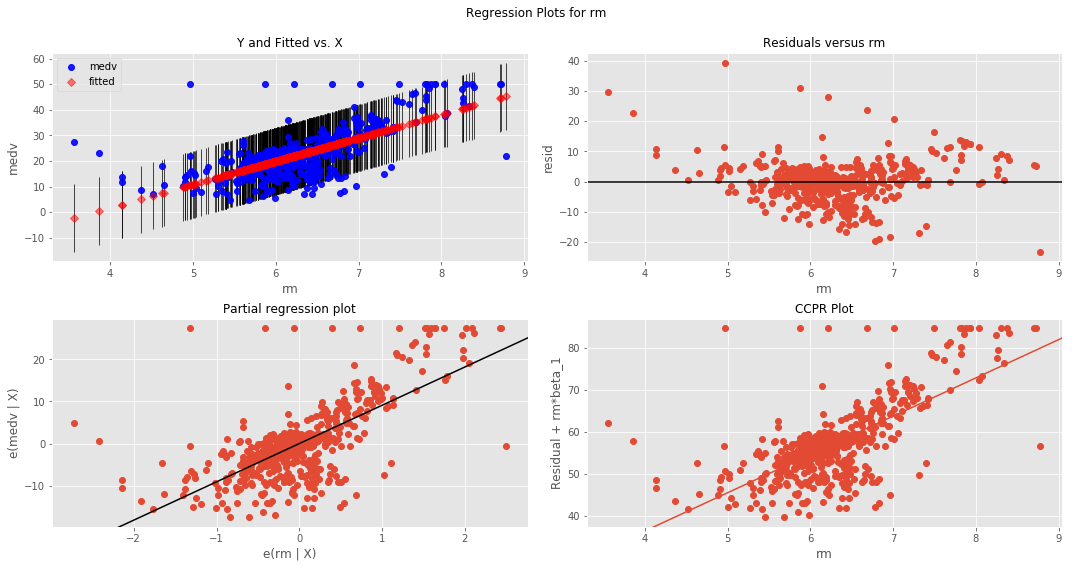

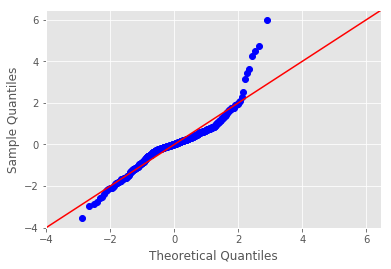

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~zn
-------------------------------------------------------------------------------------


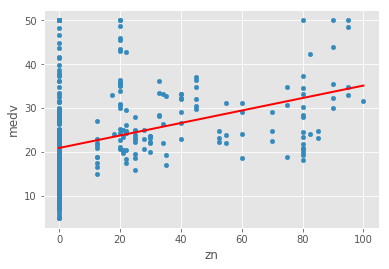

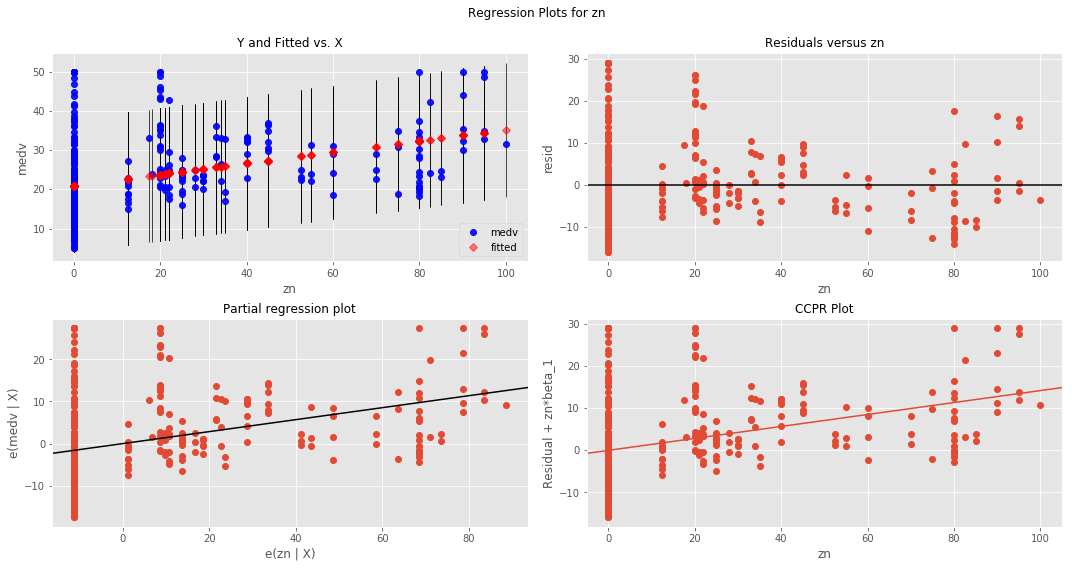

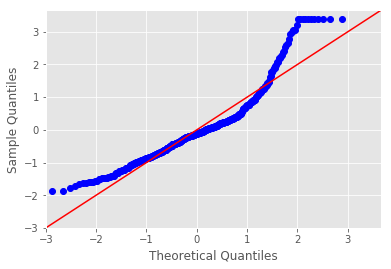

Press Enter to continue...
Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~age
-------------------------------------------------------------------------------------


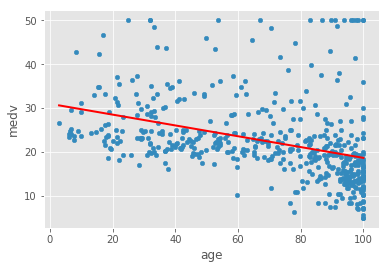

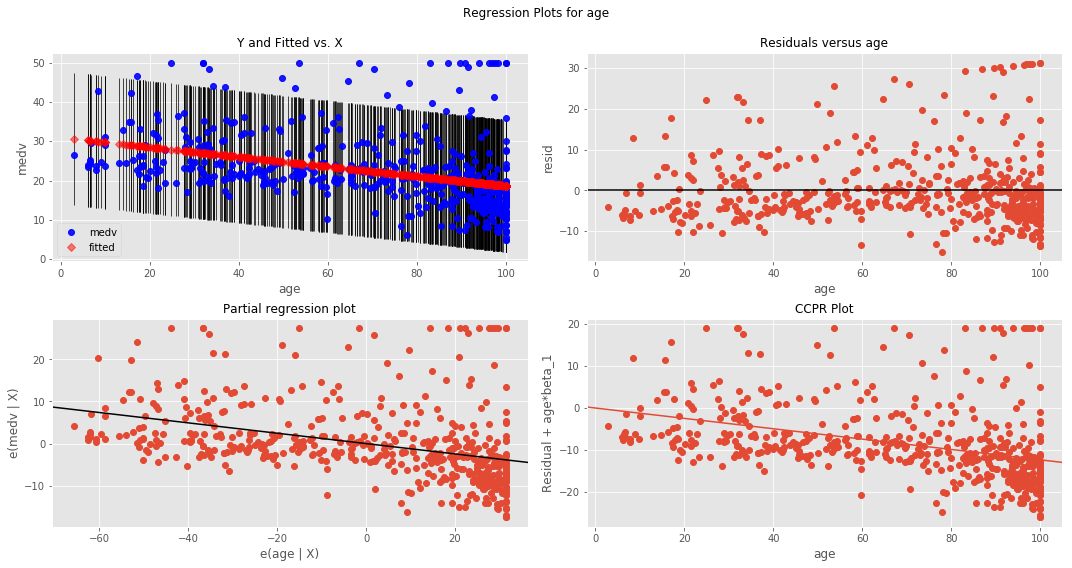

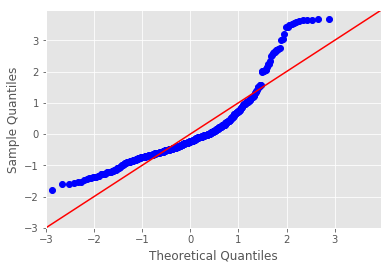

Press Enter to continue...


In [6]:
# Your code here

In [57]:
stat_array

,r2,int,slope,p_val,jb
crim,0.150780,24.033106,-0.415190,1.173987e-19,295.403720
dis,0.062464,18.390088,1.091613,1.206612e-08,305.104165
rm,0.483525,-34.670621,9.102109,2.487229e-74,612.448985
zn,0.129921,20.917579,0.142140,5.713584e-17,262.387500
age,0.142095,30.978678,-0.123163,1.569982e-18,456.983434


In [118]:
#Your obervations here 


So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 